In [27]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import lag_plot
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [29]:
# Fetch historical data
data_download = yf.download('USDIDR=X', start='2013-01-01', end='2023-06-01')

# Preprocess the data
data = data_download['Close']

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Split the data into training and testing sets 80/20
train_data = data[:int(0.8 * len(data))]
test_data = data[int(0.8 * len(data)):]
print(len(train_data))

In [12]:
train_data

Date
2013-01-01     9609.000000
2013-01-02     9609.000000
2013-01-03     9622.500000
2013-01-04     9626.299805
2013-01-07     9770.000000
                  ...     
2021-04-26    14518.000000
2021-04-27    14459.599609
2021-04-28    14516.400391
2021-04-29    14519.000000
2021-04-30    14439.700195
Name: Close, Length: 2170, dtype: float64

In [31]:
predictions = list()

# Create and fit the ARIMA model
history = [x for x in train_data]
for t in range(len(test_data)):
 model = ARIMA(history, order=(2,2,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test_data[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))

predicted=14442.103495, expected=14438.000000
predicted=14408.103323, expected=14399.099609
predicted=14359.556576, expected=14482.500000
predicted=14487.525009, expected=14399.500000
predicted=14396.672903, expected=14283.799805
predicted=14254.185518, expected=14278.000000
predicted=14201.504383, expected=14189.599609
predicted=14122.818245, expected=14220.000000
predicted=14191.425618, expected=14347.000000
predicted=14357.370581, expected=14300.299805
predicted=14348.742109, expected=14191.000000
predicted=14193.010218, expected=14344.500000
predicted=14323.193184, expected=14362.299805
predicted=14385.156619, expected=14389.700195
predicted=14460.032150, expected=14397.299805
predicted=14416.263689, expected=14348.000000
predicted=14348.870647, expected=14365.000000
predicted=14353.097327, expected=14371.400391
predicted=14361.279098, expected=14310.000000
predicted=14303.581131, expected=14318.000000
predicted=14298.792503, expected=14278.000000
predicted=14248.499086, expected=1

In [32]:
# calculate RMSE for ARIMA
score = np.sqrt(mean_squared_error(test_data, predictions))
print('Score: %.2f RMSE' % (score))

# calculate MSE for ARIMA
score = mean_squared_error(test_data, predictions)
print('Score: %.2f MSE' % (score))

# calculate MAE for ARIMA
score = mean_absolute_error(test_data, predictions)
print('Score: %.2f MAE' % (score))

# calculate R2 for ARIMA
score = r2_score(test_data, predictions)
print('Score: %.2f R2' % (score))

Score: 74.79 RMSE
Score: 5593.05 MSE
Score: 57.06 MAE
Score: 0.97 R2


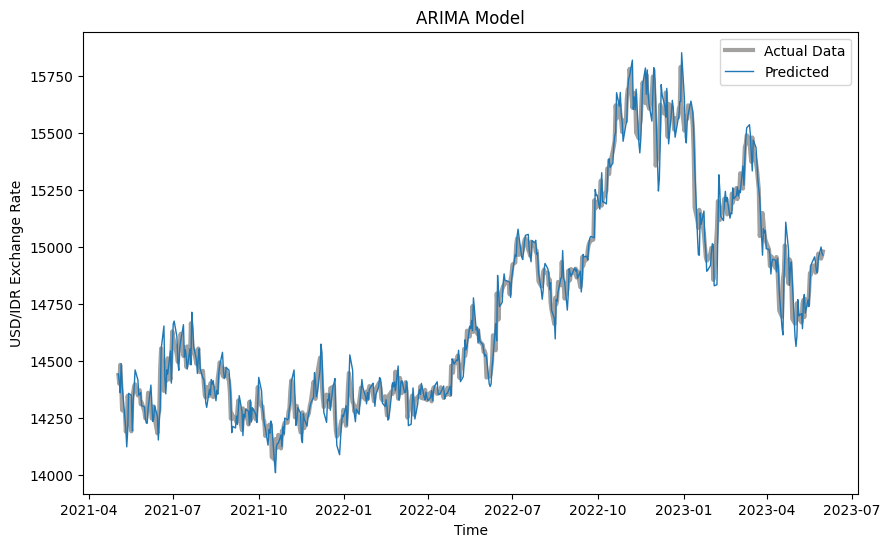

In [33]:
# Visualize the forecast
plt.figure(figsize=(10, 6))
# plt.plot(data.index, data, label='actual', color='grey',linewidth=2)
# plt.plot(train_data.index, train_data, label='training',color='red',linewidth=0.5)
plt.plot(test_data.index, test_data, color="#a3a1a0" , label='Actual Data', linewidth=3)
plt.plot(test_data.index, predictions, label='Predicted', linewidth=1)
plt.title('ARIMA Model')
plt.xlabel('Time')
plt.ylabel('USD/IDR Exchange Rate')
plt.legend()
plt.show()

In [26]:
# Create a DataFrame to store predicted values
predicted_data = pd.DataFrame({'Date': test_data.index, 'Predicted': predictions})

# Export predicted values to a CSV file
predicted_data.to_csv('ARIMA.csv', index=False)